# Matuszyńska 2016 (NPQ)

https://doi.org/10.1016/j.bbabio.2016.09.003

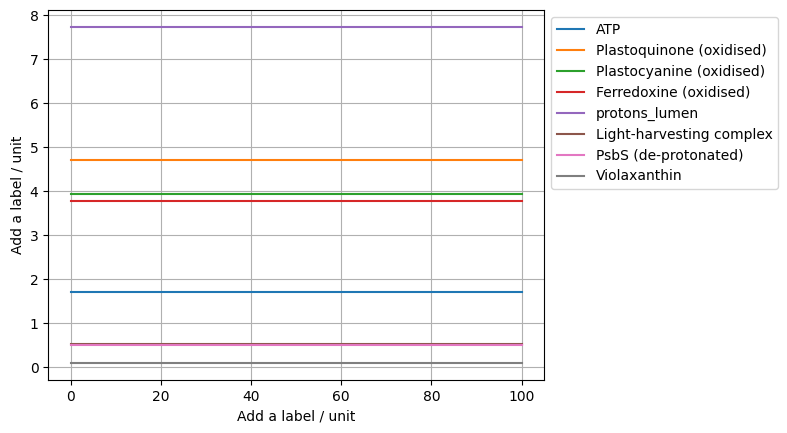

In [4]:
import numpy as np
import pandas as pd

from mxlbricks import get_matuszynska2016npq as get_model
from mxlpy import Simulator, plot, unwrap

EPS = 1e-6

model = get_model()
res = unwrap(Simulator(model).simulate(100).get_result())

fig, ax = plot.lines(res.get_variables(include_derived=False, include_readouts=False))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), ncols=1)

if (
    diff := np.linalg.norm(
        pd.Series(model.variables) - pd.Series(res.get_new_y0()), ord=2
    )
) > EPS:
    msg = f"Diff between models too large: {diff}"
    raise ValueError(msg)